# Homework 1 (HW1)

---
By the end of this homework we expect you to be able to:  
1. Load data from different formats using [pandas](https://pandas.pydata.org/);  
2. Navigate the documentation of Python packages by yourself;  
3. Filter and tidy up noisy data sets;  
4. Aggregate your data in different (and hopefully helpful) ways;  
5. Create meaningful visualizations to analyze the data;

---

## Important Dates

- Homework release: Fri 2 Oct 2020
- **Homework due**: Fri 16 Oct 2020, 23:59
- Grade release: Fri 23 Oct 2020

---

##  Some rules

1. You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, you have to justify your choice.
2. Make sure you use the `data` folder provided in the repository in **read-only** mode.
3. Be sure to provide a textual description of your thought process, the assumptions you made, the solution you implemented, and explanations for your answers. A notebook that only has code cells will not suffice.
4. For questions containing the **/Discuss:/** prefix, answer not with code, but with a textual explanation (in either comments or markdown).
5. Back up any hypotheses and claims with data, since this is an important aspect of the course.
6. Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a single notebook (plus the required data files) in the master branch. If there are multiple notebooks present, we will not grade anything.
7. Also, be sure to hand in a fully-run and evaluated notebook. We will not run your notebook for you, we will grade it as is, which means that only the results contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. In order to check whether everything looks as intended, you can check the rendered notebook on the GitHub website once you have pushed your solution there.
8. Make sure to print results or dataframes that confirm you have properly addressed the task.



## Context

The coronavirus pandemic has led to the implementation of unprecedented non-pharmaceutical interventions ranging from case isolation to national lockdowns. These interventions, along with the disease itself, have created massive shifts in people’s lives. For instance, in mid-May 2020, more than one third of the global population was under lockdown, and millions have since lost their jobs or have moved to work-from-home arrangements.


Importantly, the disease has shifted people's [needs](https://en.wikipedia.org/wiki/Toilet_paper), [interests](https://en.wikipedia.org/wiki/TikTok), and [concerns](https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Switzerland) across the globe.

In this homework, we will take a deep dive into Wikipedia data and try to uncover what changed with the pandemic. More specifically, we will be focusing on Wikipedia pageviews, that is, how many people read each article on Wikipedia each day.
A nice graphical user interface for playing with Wikipedia pageviews is available [here](https://pageviews.toolforge.org/?project=en.wikipedia.org&platform=all-access&agent=user&redirects=0&range=latest-20&pages=Cat|Dog).
Also, the Wikimedia Foundation releases dump files with the number of pageviews per article across all Wikimedia websites, including Wikipedia in all its language editions [(amazing, right?)](https://dumps.wikimedia.org/other/pagecounts-ez/). 

#### But wait, what is a pageview?

> A pageview or page view, abbreviated in business to PV and occasionally called page impression, is a request to load a single HTML file (web page) of an Internet site. On the World Wide Web, a page request would result from a web surfer clicking on a link on another page pointing to the page in question. (Source: [Wikipedia article "Pageviews"](https://en.wikipedia.org/wiki/Pageview))

Pageviews in Wikipedia can tell us that people are looking for certain information online. Analyzing how the volume and the distribution of pageviews changed can tell us about how the behavior of Wikipedia readers has changed.

In this homework, you will take a deep dive into analyzing Wikipedia pageview logs and uncover shifts in interests associated with the current pandemic.

---

## The data

First, you need to download a **meraviglioso** dataset from the Italian Wikipedia that we prepared for you. The structure of the data is described next. 

**The dataset is available in the `data` directory pushed to the same GitHub repo as the homework**. Inside of the data directory, you will find three files:

### `articles.tsv.gz`

This is a tab-separated file containing daily pageviews for a subset of the articles from Italian Wikipedia. It is compressed! Each row corresponds to a different article, and each column (except the first) corresponds to the number of pageviews this article received on a given day. The example below shows the structure for two of the things [Kristina Gligorić](https://kristinagligoric.github.io/), one of your TAs, likes the most on her Pizza:

**Example:**
~~~
index       2018-01-01 00:00:00    2018-01-02 00:00:00 (...)
Formaggio   100                    101                 (...)
Ananas      12                     54                  (...)
(...)       (...)                  (...)
~~~


### `topics.jsonl.gz`

This is a classification of which topics an article belongs to, according to a model released by the Wikimedia Foundation (the classes are derived from this [taxonomy](https://www.mediawiki.org/wiki/ORES/Articletopic)). Importantly, this file was obtained from English Wikipedia, while the previous one contains articles from the Italian Wikipedia. This is important because article titles in the Italian Wikipedia are in Italian, while article titles in the English page are in English (duh!). In any case, each line contains a .json object with
the English name of the article (name);
1. the English name of the article (`name`);
2. a set of fields related to topics themselves. Each of these fields is set as either `True` (if the article belongs to this topic) or `False` (if it does not). Notice that the same article may belong to multiple topics. 

**Example:**
~~~
{"index": "Cheese", "Culture.Food and drink": True, "Culture.Literature": False (...)}
{"index": "Pineapple", "Culture.Food and drink": True, "Culture.Literature": False (...)}
(...)
~~~

 
### `mapping.pickle`

This is a `.pickle` file, that is, a serialized Python object. You can read about Python pickles  [here](https://wiki.python.org/moin/UsingPickle), 
but in short: the default Python library `pickle` allows you to save and load Python objects to and from disk. This is one object saved via the pickle library: a Python dictionary containing a mapping between the English names and the Italian names of Wikipedia articles:

**Example:**
~~~
{
    "Cheese": "Formaggio",
    "Ananas": "Pineapple"
    (...)
}
~~~
---


## _Step 1:_ Loading the data

---
### **Task 1**

Your first task is to load all these datasets into memory using pandas and pickle. 
**You should load the files compressed.**

Here, the files at hand are rather small, and you could easily uncompress  the files to disk and work with them as plain text. 
Why, then, are we asking you to load the files compressed? The reason is that, in your life as a data scientist, this will often not be the case.

Then, working with compressed files is key so that you don't receive e-mail from your (often more responsible) colleagues demanding to know how you have managed to fill the entire cluster with your datasets. 
Another big advantage of compressing files is to simply read files faster. You will often find that reading compressed data on the fly (uncompressing it as you go), is much faster than reading uncompressed data, since reading and writing to the disk may be your [bottleneck](https://skipperkongen.dk/2012/02/28/uncompressed-versus-compressed-read/). 

 
---

**Hint:** `pandas` can open compressed files.

**Hint:** In the real world (and in ADA-homework), your file often comes with some weird lines! 
This time you can safely ignore them (but in the real world you must try to understand why they are there!). Check the `error_bad_lines` parameter on `read_csv`.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import pickle

### ~ 1.1
# Data directory
data_dir = 'data/'

# Load datasets
articles_raw = pd.read_csv(data_dir + 'articles.tsv.gz', sep='\t', compression='gzip', \
                           error_bad_lines=False, warn_bad_lines=False)
topics_raw = pd.read_json(data_dir + 'topics.jsonl.gz', lines=True, compression='gzip')
mapping = pd.read_pickle(data_dir + 'mapping.pickle')

## _Step 2:_ Filtering the data

---
### **Task 2**

Oh no! Something seems wrong with your dataframe!
It seems that some of the lines in the `articles.tsv.gz` are weird! 
They have titles in the format `"Discussione:name_of_the_page"`.

Unsure of what they mean, you ask about them in the [Wiki-research mailing list](https://lists.wikimedia.org/mailman/listinfo/wiki-research-l).
Twenty minutes later a kind internet stranger comes with an answer! 
She tells you that these are talk pages, where people discussing what should and should not be in the article (in fact it can be pretty funny to read, eg, [you can read Italians debating about pizza](https://it.wikipedia.org/wiki/Discussione:Pizza))

After understanding what they are, your task is now to filter these lines using `pandas`! After all, we are interested in pageviews going towards articles! Not discussion pages!

---

**Hint**: There is one of them in the position \#180 of the dataframe, if you want to check it!

In [2]:
### ~ 2.1
# First verify that index are unique
assert(articles_raw['index'].is_unique)
assert(topics_raw['index'].is_unique)

# Set the index column as index for both dataframes
articles = articles_raw.set_index('index')
topics = topics_raw.set_index('index')

# Remove all discussions pages from the article dataframe
articles = articles[~articles.index.str.contains("Discussione")]
print("==> {} discussions pages have been deleted"\
    .format(len(articles_raw.index) - len(articles.index)))

==> 1000 discussions pages have been deleted


## *Step 3*: Understanding the data

---
### **Task 3.1**
Data cleaning is hard huh? But now that this headache is behind us we can go on to explore our data.

Let's begin with some basic stats. It is always important to do this as a sanity check.

You should:

1. Start by calculating how many topics and articles there are. Also, while you are at it, print the names of the topics to get a grasp of what they are about. 
2. Calculate the average daily number of pageviews in the dataset.
3. **Discuss:** As previously mentioned, your data is a sample of _some_ (and not all) Wikipedia articles! Estimate (roughly) what percentage of Italian Wikipedia articles are in your dataset comparing your daily average pageview numbers with the official statistics (which can be found [here](https://pageviews.toolforge.org/siteviews/?platform=desktop&source=pageviews&agent=user&start=2020-01-01&end=2020-09-21&sites=it.wikipedia.org)). Notice that we are focusing on the desktop version of Wikipedia.

---
**Hint**: topics are in the columns of the topic file!

### • 3.1.1

In [3]:
print("They are {} articles".format(len(articles)))
print("They are {} topics".format(len(topics.columns)))
print("\nThe topics have a hierarchical organization represented as follow:")
state = []
for topic in topics.columns.sort_values().values:
    topic_array = topic.split('.')
    while(len(state) > 0 and not(state[-1] in topic_array)):
        state.pop()
    for i in range(len(state), len(topic_array)):
        state.append(topic_array[i])
        start = '  \u231e ' if i>0 else ''
        print('\t'*(i-1) + start +  state[-1])

They are 55791 articles
They are 64 topics

The topics have a hierarchical organization represented as follow:
Culture
  ⌞ Biography
	  ⌞ Biography*
	  ⌞ Women
  ⌞ Food and drink
  ⌞ Internet culture
  ⌞ Linguistics
  ⌞ Literature
  ⌞ Media
	  ⌞ Books
	  ⌞ Entertainment
	  ⌞ Films
	  ⌞ Media*
	  ⌞ Music
	  ⌞ Radio
	  ⌞ Software
	  ⌞ Television
	  ⌞ Video games
  ⌞ Performing arts
  ⌞ Philosophy and religion
  ⌞ Sports
  ⌞ Visual arts
	  ⌞ Architecture
	  ⌞ Comics and Anime
	  ⌞ Fashion
	  ⌞ Visual arts*
Geography
  ⌞ Geographical
  ⌞ Regions
	  ⌞ Africa
		  ⌞ Africa*
		  ⌞ Central Africa
		  ⌞ Eastern Africa
		  ⌞ Northern Africa
		  ⌞ Southern Africa
		  ⌞ Western Africa
	  ⌞ Americas
		  ⌞ Central America
		  ⌞ North America
		  ⌞ South America
	  ⌞ Asia
		  ⌞ Asia*
		  ⌞ Central Asia
		  ⌞ East Asia
		  ⌞ North Asia
		  ⌞ South Asia
		  ⌞ Southeast Asia
		  ⌞ West Asia
	  ⌞ Europe
		  ⌞ Eastern Europe
		  ⌞ Europe*
		  ⌞ Northern Europe
		  ⌞ Southern Europe
		  ⌞ Western Europe
	  

### • 3.1.2

In [4]:
pageview_per_day = np.mean(np.sum(articles,axis=0))
print("There is an average of {:.2f} pageviews per day in the given subset of the italian Wikipedia".
      format(pageview_per_day))

There is an average of 324267.67 pageviews per day in the given subset of the italian Wikipedia


### • 3.1.3

To have an estimate on what percentage of articles from the italian Wikipedia we have in our dataset,
`let's compute the percentage of average daily number of pageviews the articles from our dataset gather in comparaison to the Italian Wikipedia.`


In [5]:
# The official daily average pageview numbers is taken over the same time interval as our dataset
TOTAL_PAGEVIEW_PER_DAY = 5731987
print("The first estimate tells us that we have {:.2f}% articles from Italian Wikipedia".
      format(pageview_per_day / TOTAL_PAGEVIEW_PER_DAY * 100))


The first estimate tells us that we have 5.66% articles from Italian Wikipedia


However, this first estimate can be easily biased. If the sample of articles we have contains many of the popular articles, the daily average pageview would not be representative of the number of articles we have.  
A second estimate would be to take from the same source, the overall number of articles in the italian Wikipedia.  
Note that this doesn't give us the exact ratio of articles we have, because this number might also contain the *Discussions* from Wikipedia. Therefore, this estimate gives us a lower bound on the ratio of articles we have.

In [6]:
TOTAL_ARTICLES = 1641675
print("A lower bound tells us that we have at least {:.2f}% articles from Italian Wikipedia".
      format(len(articles) / TOTAL_ARTICLES * 100))

A lower bound tells us that we have at least 3.40% articles from Italian Wikipedia



### **Task 3.2**

Now that we have a better understanding of the data, let's look at some articles to get a feeling of what is happening. 

Your task is to:

1. Find all articles whose names contain the sequence of characters `"virus"` (case insensitive) and that received least 7,000 pageviews across the entire period (no point in zooming on very insignificant articles);
2. Find a way to nicely visualize __each__ one of the time-series (in a single plot, which may have multiple panels; in the lecture, Bob referred to these as “small multiples); Your visualization should allow one to see overall trends across each of the different articles and depict the overall trends, with the least noise possible. Additionally, highlight two specific dates in your plot: 31 January ([first case reported in Italy](https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Italy#First_confirmed_cases)) and 21 February ([when multiple cases were confirmed in northern Italy](https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Italy#Clusters_in_northern_Italy)).
4. **Discuss**: What did you observe? Did all the articles behave similarly?

---

**Hint**: The column dates are currently strings which are not very plot friendly. You can turn them into datetime objects using: 

~~~python
your_dataframe_name.columns = pd.to_datetime(your_dataframe_name.columns)
~~~

Notice that this only works if you have only date-related columns. Fortunately, if you get rid of the `index` column by making it a real pandas index, things should work just fine.

**Hint**: Choose your axes wisely!



### • 3.2.1

In [7]:
# We first look for the articles with "virus" in their name and keep the most popular (overall pageviews >= 7000)
articles_virus_popular = articles[articles.index.str.contains('virus', case=False) & (articles.sum(axis=1) >= 7000)]
[print("{}: {}".format(i+1, name)) for i, name in enumerate(articles_virus_popular.index)];

1: Virus_della_leucemia_felina
2: Malattia_da_virus_Ebola
3: Influenzavirus_A_sottotipo_H1N1
4: Rhinovirus
5: Virus_(informatica)
6: Herpesvirus_umano_3
7: Antivirus
8: Virus_respiratorio_sinciziale_umano


### • 3.2.2

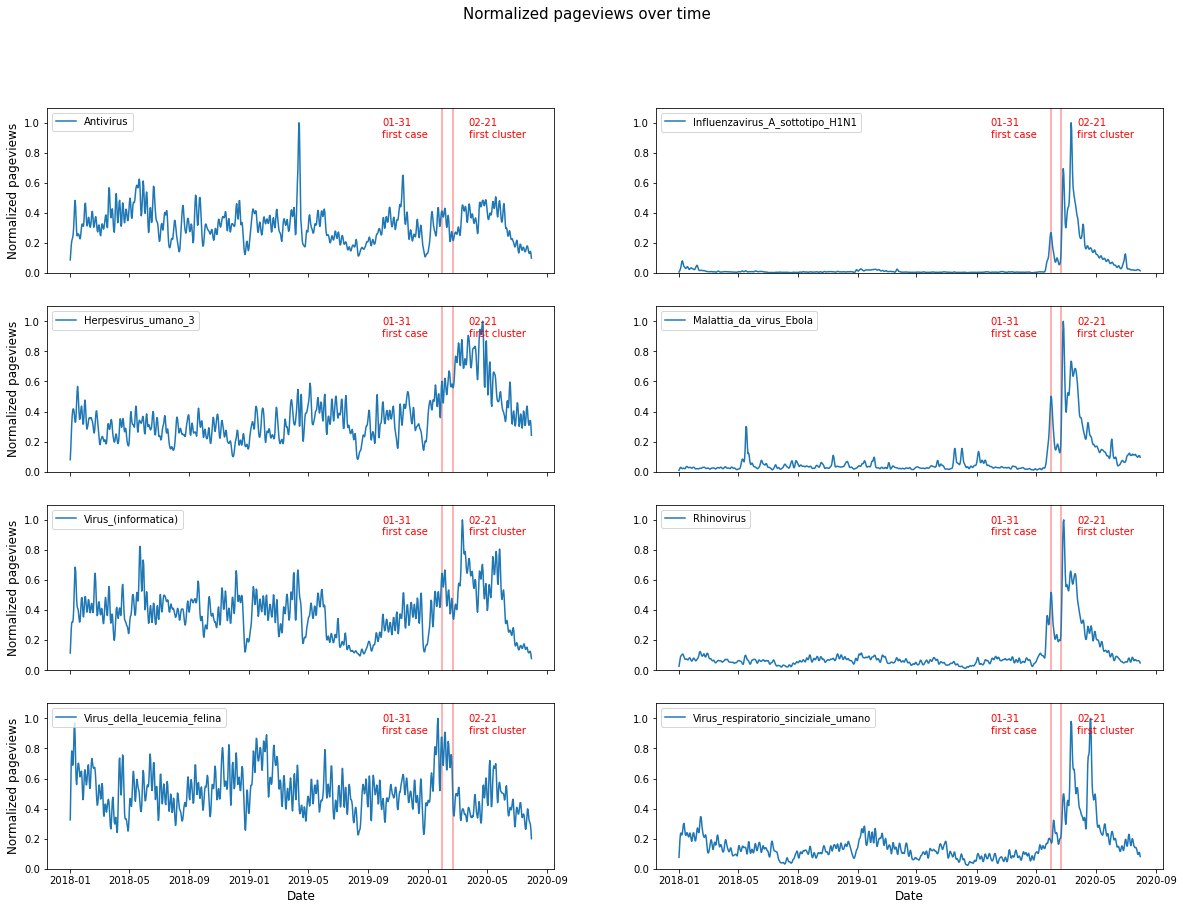

In [8]:
datetime = pd.to_datetime(articles_virus_popular.columns)
# Reordering of the articles to group them by trend in the plot
articles_virus_popular = articles_virus_popular.loc[
    ['Antivirus', 'Herpesvirus_umano_3', 'Virus_(informatica)', 
     'Virus_della_leucemia_felina', 'Influenzavirus_A_sottotipo_H1N1', 
     'Malattia_da_virus_Ebola', 'Rhinovirus', 'Virus_respiratorio_sinciziale_umano']]

fig, ax = plt.subplots(nrows=4, ncols=2, sharex=True, figsize=(20,14))
l = len(articles_virus_popular)//2
upper_lim = 1
# Hamming window
kernel = 0.54 - 0.46*np.cos(2*np.pi*np.arange(7)/7)
for i in range(len(articles_virus_popular)):
    # Indexing in order to have first four on the left column and the rest on the right
    ax[i%l, i//l].axvline(pd.Timestamp('2020-01-31'), color='r', alpha=0.4)
    ax[i%l, i//l].axvline(pd.Timestamp('2020-02-21'), color='r', alpha=0.4)
    # Moving average 
    pageviews_virus = np.convolve(articles_virus_popular.iloc[[i]].squeeze(), kernel, mode='same')
    ax[i%l, i//l].plot(datetime, pageviews_virus/pageviews_virus.max(), \
        label= articles_virus_popular.index[i])
    ax[i%l, i//l].legend(loc='upper left')
    ax[i%l, i//l].set_ylim(0, 1.1)
    if i//l == 0:
        ax[i%l, i//l].set_ylabel('Normalized pageviews', fontsize=12)
    if i%l == 3:
        ax[i%l, i//l].set_xlabel('Date', fontsize=12)
    
    # label important dates
    first_case_index = pd.Timestamp('2019-09-30')
    multiple_cases_index = pd.Timestamp('2020-03-25')

    text_y_offset = 0.9
    ax[i%l, i//l].text(first_case_index, text_y_offset, '01-31\nfirst case', \
    color='r', fontsize=10)
    ax[i%l, i//l].text(multiple_cases_index,text_y_offset, '02-21\nfirst cluster', \
    color='r', fontsize=10)

    plt.suptitle('Normalized pageviews over time', fontsize=15)
    


### Note about the graph
We applied a moving average using a [Hamming window][https://en.wikipedia.org/wiki/Window_function#Hann_and_Hamming_windows] to reduce the noise and we also normalized the pageviews by dividing by the maximum pageviews of each article to have a better visualisation of the trends.

### • 3.2.3

We observe **two trends** among the eight popular articles containing the word « virus ».  
As we normalized each plot (individually), the plots are meant to emphasized big fluctuation over time.
The four plots on the left are noisy and have a constant pattern over time, whereas the four plots on the right have a similar pattern : their pageviews explode near the apparition of the Covid-19 in Italy.

When we look closer to the data, we also observe that the plots on the right are all viruses that have actual similarities with the Covid-19. On the other hand, the plots on the left are unrelated to the latter (computer virus, antivirus, herpes and leukemia). This indeed confort what we see in the plots.


### **Task 3.3**

Before we move on, let's make a final sanity check and analyze the distribution of pageviews over all articles in our dataset. You are given a function to calculate the **cumulative distribution function** (CDF) of a sample. The CDF is a function f(x) associated with a data sample. For each value x, f(x) represents the percentage of elements in your sample that have values smaller or equal to x (read more about it [here](https://en.wikipedia.org/wiki/Empirical_distribution_function)).
Your task is to:

1. Calculate the CDF of the distribution of pageviews across all days over articles. That is, a) calculate the total number of pageviews each article has received and then, b) calculate the CDF for these values.


2. Now plot this function using different scales for the x- and y-axis. You should plot it in 4 different ways:

    a. x-axis on linear scale, y-axis on linear scale
    
    b. x-axis on log scale, y-axis on linear scale
    
    c. x-axis on linear scale, y-axis on log scale
    
    d. x-axis on log scale, y-axis on log scale
    
3. **Discuss:** There is a pretty odd fact about the distribution of our data! Can you spot it and describe it? Which of the different plots (a-d) allows you to find this oddity? Why isn't this visible in the other plots?

---

**Hint:** You can use `plt.xscale` and `plt.yscale`.

In [9]:
# This function is being given to you with a usage example :)! Make good use!

def get_cdf(vals):
    # Input:
    # -- vals: an np.array of positive integers
    # Output:
    # -- x: an array containing all numbers from 1 to max(vals);
    # -- y: an array containing the (empirically calculated) probability that vals <= x
    
    y = np.cumsum(np.bincount(vals)[1:])
    y = y / y[-1]
    y = y
    x = list(range(1, np.max(vals) + 1))
    return x, y  

### • 3.3.1

In [10]:
articles_pageviews = articles.sum(axis=1)
views, cdf = get_cdf(articles_pageviews)

### • 3.3.2

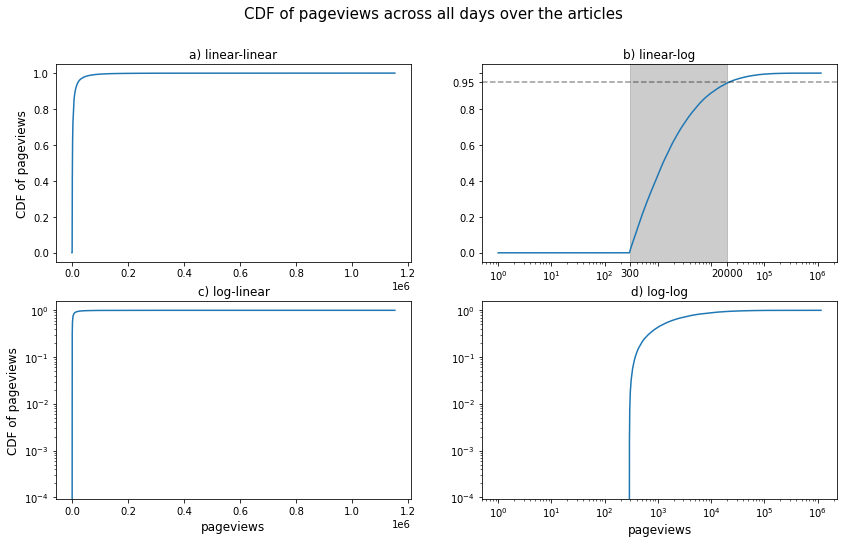

In [11]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14,8))
plt.suptitle("CDF of pageviews across all days over the articles", fontsize=15)

ax[0, 0].plot(views, cdf)
ax[0, 0].set_title("a) linear-linear")
ax[0, 0].set_ylabel("CDF of pageviews", fontsize=12)

ax[0, 1].plot(views, cdf)
ax[0, 1].set_xscale('log')
ax[0, 1].set_title("b) linear-log")
ax[0, 1].axvspan(300, 20000, color='gray', alpha=0.4)
ax[0, 1].axhline(0.95, color='k', linestyle='--', alpha=0.4)

ax[0, 1].set_yticks(np.array([0.0, 0.2, 0.4, 0.6, 0.8, 0.95, 1]))
ax[0, 1].set_yticklabels(np.array(["0.0", "0.2", "0.4", "0.6", "0.8", "0.95", ""]))
ax[0, 1].set_xticks(np.array([10**0, 10**1, 10**2, 300, 10**3, 10**4, 20000, 10**5, 10**6]))
ax[0, 1].set_xticklabels(np.array([r'$10^0$', r'$10^1$', r'$10^2$', "300", '', '', 
                                   "20000", r'$10^5$', r'$10^6$']))

ax[1, 0].plot(views, cdf)
ax[1, 0].set_yscale('log')
ax[1, 0].set_title("c) log-linear")
ax[1, 0].set_xlabel("pageviews", fontsize=12)
ax[1, 0].set_ylabel("CDF of pageviews", fontsize=12)

ax[1, 1].plot(views, cdf)
ax[1, 1].set_xscale('log')
ax[1, 1].set_yscale('log')
ax[1, 1].set_title("d) log-log")
ax[1, 1].set_xlabel("pageviews", fontsize=12)
plt.show()

### • 3.3.3
### Discussion
First we can see from the linear-log plot that 95% of the articles in our dataset have between 300 and 20000
pageviews and the rest of the articles have more than 20000 pageviews.  
While we could expect such a result, it is quite odd to see that **no** articles in our dataset have less than
250 pageviews. This could be explained by the fact that Wikipedia might not keep the articles in its dataset
until they reach a certain amount of pageviews for their analysis. To verify this hypothesis we would need 
more information from the original dataset.  

Only plot b) and d) allow us to note this oddity. Indeed as plot a) and c) have their x-axis linearly scaled, 
some outliers with a huge number of pageviews (around one million) make the diagram too wide to observe 
any distinctions on articles with few views. 

## *Step 4*: Analyzing Overall Pageview Volume


---
### **Task 4.1**

So far we have seen anecdotal examples. Now let’s move to the big picture! How did Wikipedia pageviews change in general? To gain a better understanding of how Wikipedia’s overall pageview volume has changed during the pandemic, you should do the following:

1. Calculate and visualize the pageviews trends across summed across **all** articles in Italian Wikipedia for the year 2020. (and only for 2020!). 
2. **Discuss**: what regular pattern (something that repeats over and over) do you see in the data?
3. Pre-process the data to remove this regular pattern and make the overall trend clearer. Repeat the plot with the processed data.

---

**Hint**: A convenient way to use `.groupby` alongside dates is to use the [`pd.Grouper`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Grouper.html) class. Basically, it allows you to group by date periods given frequencies determined by the parameter `freq`. To read how to specify different types of frequencies, see [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases). Recall that, in order to turn an index, column index -- or pretty much anything -- into a timestamp, you can use  [`pd.to_timestamp`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_timestamp.html).

### • 4.1.1

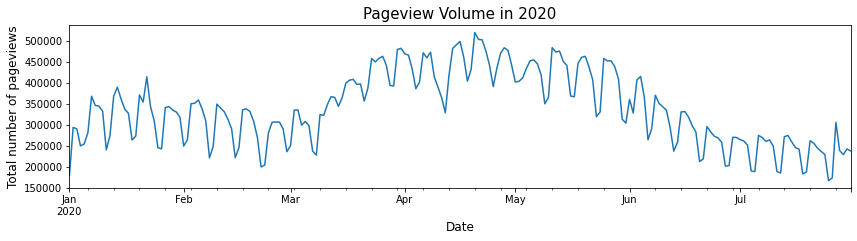

In [12]:
# Convert columns names to multiIndex(year, datetime)
articles_by_year = articles.copy()
articles_by_year.columns = pd.MultiIndex.from_arrays([[datetime[:4] for datetime in\
    articles_by_year.columns], pd.to_datetime(articles_by_year.columns)])

# compute total views of all article for a given day
articles_2020_total = articles_by_year['2020'].sum()

# visualize the results
plt.figure(figsize=(14,3))
articles_2020_total.plot()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total number of pageviews', fontsize=12)
plt.title('Pageview Volume in 2020', fontsize=15)
plt.show()

**Observation** 

The graph has spikes and is hard to read. Indeed, we can observe a patern of a sharp increases followed by a rapid decrease. Furthermore, there seems to be about four spikes per month. We can infer that the distribution of page views changes throughout the week. To confirm this let's group pageviews by day of week.

In [13]:
# function taken from data visualisation tutorial. It allows us to compute non-parametric confidence intervals
def bootstrap_CI(data, nbr_draws):
    means = np.zeros(nbr_draws)
    data = np.array(data)

    for n in range(nbr_draws):
        indices = np.random.randint(0, len(data), len(data))
        data_tmp = data[indices] 
        means[n] = np.nanmean(data_tmp)

    return [np.nanpercentile(means, 2.5),np.nanpercentile(means, 97.5)]

Text(0.5, 1.0, 'Mean number of pageviews per weekday in 2020')

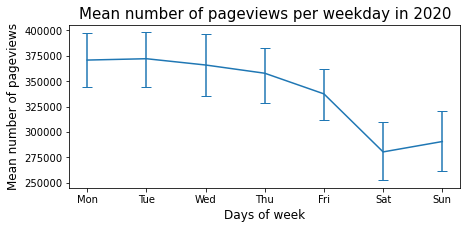

In [14]:
# Create frame of total pageviews per day
articles_per_day = articles_2020_total.to_frame(name='pageviews')\
    .reset_index()\
    .rename(columns={'index':'date'})
# Find day of the week for each date and add it to dataframe
articles_per_day.day = articles_per_day.date.dt.dayofweek

# Find mean page views for each day in 2020 with non-parametric confidence intervals
# (adapted from the data visualisation tutorial solution)
articles_per_day_group = articles_per_day.groupby(articles_per_day.day)\
    .apply(lambda days: pd.Series({
        'average': days["pageviews"].mean(),
        'lower_err': bootstrap_CI(days["pageviews"], 1000)[0],
        'upper_err': bootstrap_CI(days["pageviews"], 1000)[1]
    }))

# Visualize the results
plt.figure(figsize=(7,3))
plt.errorbar(articles_per_day_group.index, articles_per_day_group.average,\
    yerr = [articles_per_day_group.lower_err - articles_per_day_group.average,\
    articles_per_day_group.average - articles_per_day_group.upper_err], capsize=5)

plt.xticks(range(7), ['Mon','Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.xlabel('Days of week', fontsize=12)
plt.ylabel('Mean number of pageviews', fontsize=12)
plt.title('Mean number of pageviews per weekday in 2020', fontsize=15)

**Observation**

The confidence intervals are calculated with a γ of 95% and are non-parametric. 
From the mean number of pageviews per weekday we can separate the week into two categories. These are the buisness days (Monday to Friday), where the pageview amount is high but decreases each day, and the weekend (Saturday and Sunday) where the pageviews are lower. 

### • 4.1.2
**Discussion**

From this observation we can explain the paterns of the first graph because the peeks correspond to the sharp increase in pageviews after the weekend and the rapid decrease is also seen throughout the week.

To smooth out this effect we should group **by week** so this effect is removed. The best way to do so is to use a moving average which will aproximate one day by the average of the surrounding 6 days and itself. Thus, we will have the average of one week worth of days and we will keep all days (except the first three and last three days which do not have enough valid days for the moving average). 

### • 4.1.3

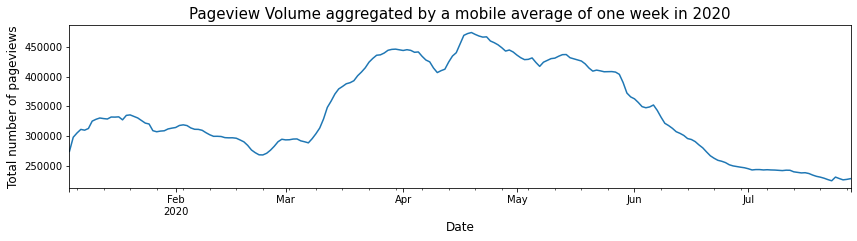

In [15]:
kernel_mov_avg = [1/7.0]*7
# The convolution (mode='valid') will crop the first three days and the last three days from the year
articles_2020 = pd.Series(data=np.convolve(articles_2020_total, kernel_mov_avg, 'valid'),\
    index=articles_2020_total.index[3:-3], name="mov_average") 
# Visualise smoothed result
plt.figure(figsize=(14,3))
articles_2020.plot()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total number of pageviews', fontsize=12)
plt.title('Pageview Volume aggregated by a mobile average of one week in 2020', fontsize=15)
plt.show()

#### Note for graphs using moving average by year
The first three days and last three days of each year are not represented in the graph for consistency reasons (i.e. missing values during the convolution)

### **Task 4.2**

To get an even clearer picture, your task now is to compare the pageview time series of the current year (2020) with the time series of the previous year (2019).

1. Make a visualization where the two years are somehow "aligned", that is, where it is possible to compare the same time of year across the two years. Additionally, your visualization should highlight the date on which the nationwide lockdown started in Italy, 9 March 2020. Preprocess each one of the time series (for each year) the same way you did in Task 4.1.

3. **Discuss:** What changed from 2019 to 2020? Form and justify hypotheses about  the reasons behind this change.

---

**Hint**: In order to use two different y-axes in the same plot, you can use plt.twiny() or ax.twinx() (the latter if you are using the subplots environment;  [See this example](https://matplotlib.org/3.3.1/gallery/subplots_axes_and_figures/two_scales.html)).

### • 4.2.1

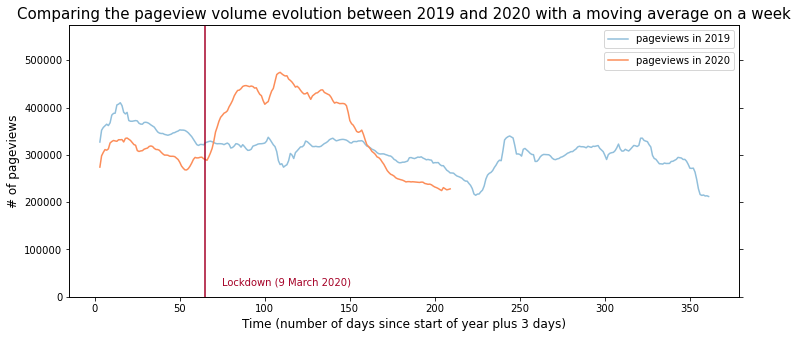

In [16]:
# Compute total number of pageviews for year 2019
articles_2019_total = articles_by_year['2019'].sum()

kernel_mov_avg = [1/7.0]*7
# The convolution (mode='valid') will crop the first three days and the last three days from the year
articles_2019 = pd.Series(data=np.convolve(articles_2019_total, kernel_mov_avg, 'valid'),\
    index=articles_2019_total.index[3:-3], name="mov_average") 

# Visualize 2019 vs. 2020
fig, ax1 = plt.subplots(figsize=(12,5))

# 2019
blue="#91bfdb"
ax1.set_xlabel('Time (number of days since start of year plus 3 days)', fontsize=12)
ax1.set_ylabel('# of pageviews', fontsize=12)
ax1.plot(range(3, len(articles_2019)+3), articles_2019, color=blue)
ax1.legend(["pageviews in 2019"],loc='upper right', bbox_to_anchor=(1, 1))

# 2020
orange="#fc8d59"
ax2 = ax1.twinx()  # share x
ax2.plot(range(3, len(articles_2020)+3), articles_2020, color=orange)
ax2.set_yticklabels([])
ax2.legend(["pageviews in 2020"], loc='upper right', bbox_to_anchor=(1, 0.92))

max_val = int(np.max([articles_2019.max(), articles_2020.max()]))
ax1.set_ylim(0, max_val+100000) # share y axis
ax2.set_ylim(0, max_val+100000) # share y axis

# Draw lockdown line 
red = "#a50026"
lockdown_position_x = articles_2020.index.get_loc('2020-03-09')
text_x_offset = 10
text_y_offset = 25000
plt.axvline(x=lockdown_position_x, ymin=0, ymax=1, color=red)
plt.text(lockdown_position_x + text_x_offset,text_y_offset, 'Lockdown (9 March 2020)', \
    color=red, fontsize=10)
plt.title('Comparing the pageview volume evolution between 2019 and 2020 with a moving average on a week', fontsize=15)
plt.show()

### • 4.2.2

**Discussion**

We use a mobile average to smooth out the effect a week has on the pageviews distributions. This means we average one full week from each day to compute the sum of pageviews on that day.

Both the year 2019 and 2020 seemed to follow the same trend in the first 10 weeks with 2020 having less pageviews overall than 2019. However, around the lockdown on the 9th of March 2020, the number of pageviews increases dramatically. In contrast, in 2019, we have a relatively constant amount of pageviews. Since the sharp increase in pageviews coincides with the lockdown we can infer that the **lockdown and the increase in page views are correlated.**

However, why would one affect the other? Here are two hypotheses:
 1. The coronavirus prompted an interest in medical articles to understand what the situation was about which significantly increased the overall pageview volume.
 2. Similarly, due to lockdown boredom there could simply be a global increase in pageviews 
 
In the following part we will have the opportunity to examine these hypothesis (section 5.2).

## *Step 5*: Fiddling with Topics

---
### **Task 5.1**

We now turn to a different question: what topics were impacted by the lockdown? 
To start unpacking this question, your task now is to aggregate, for each day, all pageviews that went to each one of the 64 topics. 

There are multiple ways to do this, but for the sake of this exercise, you must create a dataframe where each row contains the number of pageviews a topic obtained on a given day! Example:

~~~
index       date                   views             
TOPIC1      2019-01-01             101              
TOPIC1      2019-01-02             151             
(...)       (...)                  (...)
TOPICK      2019-01-01             1010              
TOPICK      2019-01-02             2123            
(...)       (...)                  (...)
~~~

---

**Hint**: You've should find a way to make the index in the dataframe with the topics be the same as the index in the dataframes with the articles. See the file `mapping.pickle`.

**Hint**: You may want to use `.melt`.

### • 5.1.1

In [17]:
# Standardization of english language for index
mapping_it_to_eng = {value:key for key, value in mapping.items()}
articles_eng = articles.reindex(articles.index.map(lambda val: mapping_it_to_eng[val] \
    if val in mapping_it_to_eng.keys() else val), copy=True)
print("--> Articles' names have heen translated to english")

# Create multiIndex index for columns to facilitate access
articles_eng.columns = pd.MultiIndex.from_arrays([['date']*len(articles_eng.columns), articles_eng.columns])
topics_multi = topics.copy()
topics_multi.columns = pd.MultiIndex.from_arrays([['topic']*len(topics.columns), topics.columns])

--> Articles' names have heen translated to english


In [18]:
# Remove ALL duplicates and perform inner merge
# See justification below (5.1.2)
articles_eng_unique = articles_eng.drop_duplicates(keep=False, inplace=False)
results = topics_multi.merge(articles_eng_unique, right_index=True, left_index=True, how='inner')

In [19]:
# Create a dictionary containing all related articles given a specified topic
topics_stacked = results['topic'].transpose().stack()
topics_stacked = topics_stacked[topics_stacked]
topics_by_articles = topics_stacked.index.get_level_values(0).values
articles_all = topics_stacked.index.get_level_values(1).values
articles_by_topics = {}
for topic in topics_multi.columns.get_level_values(1):
    articles_by_topics[topic] = np.array(articles_all[topics_by_articles == topic])

In [20]:
# Create the views column (containing the number of views) corresponding to each articles
views = np.array([])
for topic, article_list in articles_by_topics.items():
    views_topic = results.loc[article_list]['date'].sum(axis=0)
    views = np.append(views, views_topic)

In [21]:
# Create the dataframe containing for each topics and each date, the corresponding number of views
topic_date_index = pd.MultiIndex.from_arrays([np.repeat(topics.columns, len(articles.columns)), \
    pd.to_datetime(np.tile(articles.columns, len(topics.columns)))], names=['topic', 'date'])
pageviews = pd.DataFrame(data=views, index=topic_date_index, columns=['views'], dtype=np.int32)
pageviews = pageviews.sort_index() # index need to be sorted to use Index slicing
pageviews

views
topic                        date             
Culture.Biography.Biography* 2018-01-01  45454
                             2018-01-02  66539
                             2018-01-03  66799
                             2018-01-04  73580
                             2018-01-05  67036
...                                        ...
STEM.Technology              2020-07-27   6887
                             2020-07-28   6479
                             2020-07-29   6808
                             2020-07-30   8020
                             2020-07-31   6663

[60352 rows x 1 columns]

### • 5.1.2
#### Added in complement to 5.1.1
In the line `articles_eng.drop_duplicates(keep=False, inplace=False)`, we decided to drop all duplicates as the merging was not consistent for these data. Indeed, we were not sure which one to drop for all cases so we droped all of them for consistency reasons.  
Example:  
Articles' name in Italian Wikipedia and after translation:  
Millennio --> Millennium                
Millenium --> Millennium


### **Task 5.2**

Now to the **grand finale**. We will consider two periods:
- the 35 days before the quarantine started (in the 9th of March); and 
- the 34 days after the quarantined started (including the day of the quarantine itself).

Create a visualization where you can compare, for each topic, the mean **number of views** in the aforementioned periods (that is, before and after the quarantine started). **Although there is a very large number of topics, your visualization should be a compact panel, small enough to fit on an A4 page.**

---

**Hint**: [Hoooray](https://seaborn.pydata.org/examples/index.html).

In [22]:
def compute_diff_by_topic(df, day_of_interest=pd.to_datetime('2020-03-09 00:00:00'), \
    days_before=35, days_after=35, sort_by='views'): 
    # Extract views from period
    start_first_period = day_of_interest - pd.to_timedelta(days_before, unit='d')
    end_second_period = day_of_interest + pd.to_timedelta(days_after, unit='d')
    df_before = df.loc[pd.IndexSlice[:, start_first_period:day_of_interest], :]
    df_after = df.loc[pd.IndexSlice[:, day_of_interest:end_second_period], :]
    # Compute mean over period
    df_before = df_before.groupby(by='topic').agg('mean')
    df_after = df_after.groupby(by='topic').agg('mean')

    df_sub = df_after.subtract(df_before)
    df_sub = df_sub.sort_values(by=sort_by)
    df_before = df_before.loc[df_sub.index]
    df_after = df_after.loc[df_sub.index]
    return df_sub, df_before, df_after

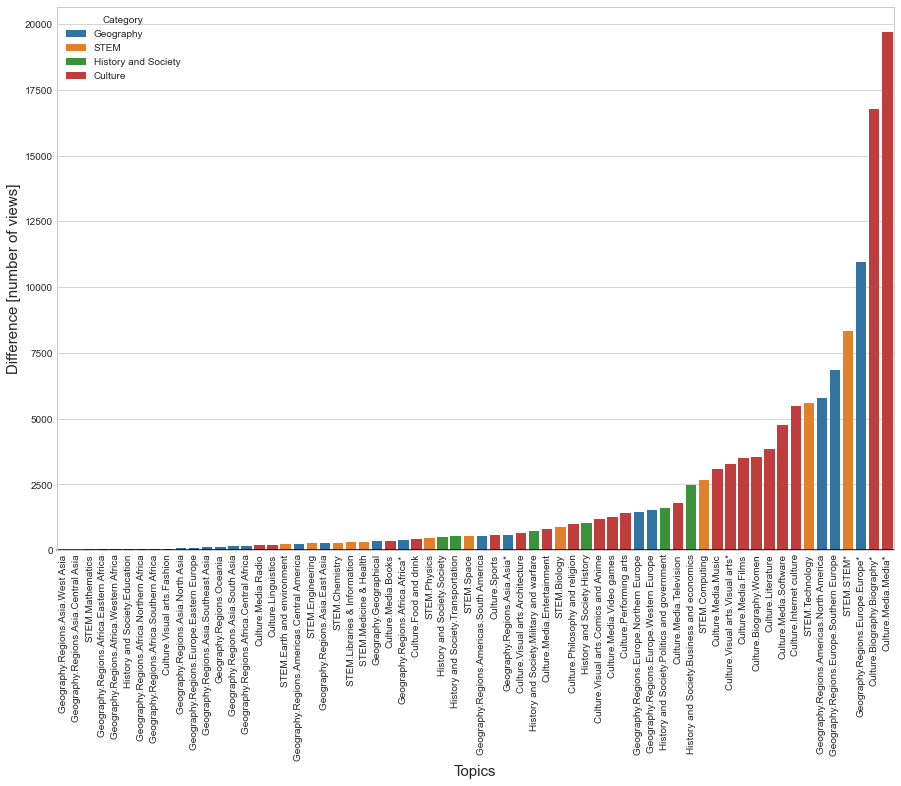

In [23]:
plt.style.use('seaborn-whitegrid')

# Compute pageviews for different periods
pageviews_sub, pageviews_before, pageviews_after = compute_diff_by_topic(pageviews, sort_by='views')

f, ax2 = plt.subplots(figsize=(15, 10))
pageviews_sub['Category'] = [topic.split('.')[0] for topic in pageviews_sub.index]
g = sns.barplot(data=pageviews_sub, x=pageviews_sub.index, y='views', \
    hue='Category', ax=ax2, dodge=False)
ax2.tick_params(axis='x', rotation=90)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel("Difference [number of views]", fontsize=15)
ax2.set_xlabel("Topics", fontsize=15)
plt.show()

### Observation
We can see that there are no topics that got less views during the lockdown than before. Concerning the hypothesis made in section 4.2.1, the second (i.e. increase in pageviews due to boredom during the lockdown) seems more probable given the observations of the graph.  
The first hypothesis (i.e. interest in fields related to medicine) cannot be confirmed given that topics related to medicine are not the one with the highest increase (i.e. STEM.Medicine & Health is the 41st subject in terms of pageview augmentation).

### **Task 5.3**

Notice that the previous analysis fails to isolate the increases or decreases in each individual topic from the overall increases or decreases in pageviews across Wikipedia in general. That is, it could be that all topics gained/lost pageviews, but some did so more than articles in general, while others did so less than articles in general. To address this issue, you should:


1. Normalize the pageviews counts in the dataframe created in Task 5.1. Instead of using the raw number of pageviews, you should compute, for each day, what fraction of all pageviews a topic received.

2. Create a second visualization that shows not the **raw** value of pageviews before and after, but the **relative** value that you just calculated.

3. **Discuss:** According to Task 5.2, what topics have increased in terms of the raw, absolute number of pageviews after the quarantine started? In relative, rather than absolute, terms, do these findings still hold? If not, what has changed?

---

### • 5.3.1

In [24]:
# Normalizing views for each category over each day
pageviews_normalized = pageviews.groupby(by='date').apply(lambda views: views * 100 / views.sum())

### • 5.3.2

In [25]:
def get_color(category):
    palette = sns.color_palette()
    dict_color = {'Geography':palette[0], 'STEM':palette[1], 'History and Society':palette[2], 'Culture':palette[3]}
    return dict_color[category]

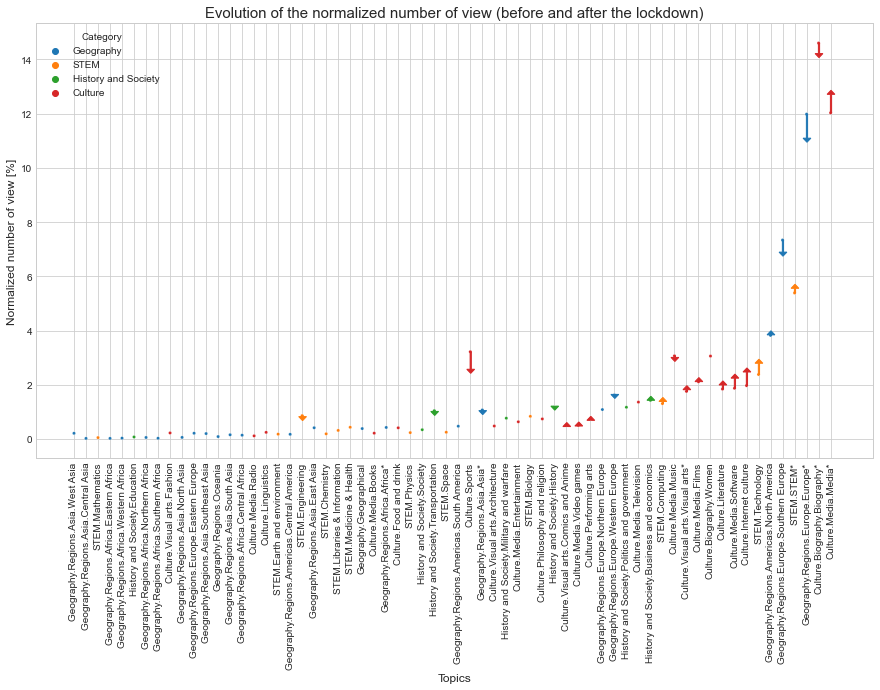

In [26]:
# Compute pageviews for different periods
pageviews_normalized_sub, pageviews_norm_before, pageviews_norm_after = \
    compute_diff_by_topic(pageviews_normalized, sort_by='views')
# Reindexing to have same indexing as pageviews_sub
pageviews_normalized_sub = pageviews_normalized_sub.loc[pageviews_sub.index]
pageviews_norm_before = pageviews_norm_before.loc[pageviews_sub.index]
pageviews_norm_after = pageviews_norm_after.loc[pageviews_sub.index]
pageviews_norm_before['Category'] = [topic.split('.')[0] for topic in pageviews_norm_before.index]
f, ax = plt.subplots(figsize=(15, 8))
# Plot arrows to represent evolution over time
for i in range(len(pageviews_norm_before)):
    dy = pageviews_norm_after['views'][i]-pageviews_norm_before['views'][i]
    if np.abs(dy) > 0.1:
        ax.arrow(i+0.035, pageviews_norm_before['views'][i], dx=0, dy=dy,\
            head_width=0.65, head_length=0.15, width=0.1, \
            color=get_color(pageviews_norm_before['Category'][i]), length_includes_head=True)
# Plot initial values
sns.scatterplot(data=pageviews_norm_before, x=pageviews_norm_before.index, y='views', ax=ax, s=10, marker='o', hue='Category')

ax.tick_params(axis='x', rotation=90)
ax.set_xlabel("Topics", fontsize=12)
ax.set_ylabel("Normalized number of view [%]", fontsize=12)
plt.title('Evolution of the normalized number of view (before and after the lockdown)', fontsize=15)
plt.show()

### Observation
1. All changes that are lower than **0.10%** between the 2 periods are not represented as arrows in the graph but are represented as dot markers and its position correspond to the value before the lockdown.  
2. The topics were ordered in the same way as to keep the same ranking as the previous graph.

### • 5.3.3
As observed, in section 5.2, all topics have increased in terms of the raw number of pageviews after the quarantine started.  
However, concerning the relative values, the tendencies pictured on the other graph don't hold anymore.  
For the first subject (i.e. *Culture.Media.Media*) both absolute and relative pageviews evolution share the same trend. The two following subject (i.e. *Culture.Biography.Biography* and *Geography.Regions.Europe.Europe*) show a different trend. Indeed, they decreased in terms of relative number of pageviews, this can be explained by the fact that the growth in raw pageviews is not enough to increase its contribution to the total number of articles. 

To conclude, **raw pageview** evolution are helpful to see which topics caused the rise in pageview volume after the lockdown while the **relative increases** let us see that even if *Culture.Biography.Biography* and *Geography.Regions.Europe.Europe* were among the top contributors, the relative interest for these topics declined instead.


---